In [1]:
import pandas as pd
import numpy as np

In [71]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science\Time series

19-04-2024  14:42    <DIR>          .
17-04-2024  13:07    <DIR>          ..
19-04-2024  12:17    <DIR>          .ipynb_checkpoints
19-04-2024  12:15            55,852 daily-minimum-temperatures-in-me.csv
17-04-2024  12:18            55,837 daily-minimum-temperatures-in-me.csv.xls
19-04-2024  14:41            78,199 DailyDelhiClimateTrain.csv
19-04-2024  12:19           590,808 Data Preperation.ipynb
19-04-2024  12:15             7,318 Electric_Production.csv
19-04-2024  12:15             6,903 monthly-beer-production-in-austr.csv
19-04-2024  14:32           183,540 ploting time series.ipynb
19-04-2024  12:15               509 sales-of-shampoo-over-a-three-ye.csv
18-04-2024  12:12            32,954 Time_Series_Forecasting.ipynb
               9 File(s)      1,011,920 bytes
               3 Dir(s)  187,435,405,312 bytes free


In [79]:
humidity = pd.read_csv("DailyDelhiClimateTrain.csv",usecols=["date","humidity"],header =0,index_col=0,parse_dates=True).squeeze()


In [80]:
humidity

date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64

### descriptive statistics

In [81]:
humidity.describe(include="all")

count    1462.000000
mean       60.771702
std        16.769652
min        13.428571
25%        50.375000
50%        62.625000
75%        72.218750
max       100.000000
Name: humidity, dtype: float64

In [82]:
humidity.unique

<bound method Series.unique of date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64>

### rolling Window Statistics

In [83]:
d = pd.DataFrame(humidity.values)
shifted = d.shift(1)
window = shifted.rolling(window=2)
window

Rolling [window=2,center=False,axis=0,method=single]

In [84]:
shifted

,0
0,NaN
1,84.500000
2,92.000000
3,87.000000
4,71.333333
...,...
1457,67.550000
1458,68.043478
1459,87.857143
1460,89.666667


In [85]:
means=window.mean()

In [86]:
df3 = pd.concat([means,d,shifted],axis=1)
df3.columns = ['mean(t-1,t)','t+1','t']

In [87]:
df3

,"mean(t-1,t)",t+1,t
0,NaN,84.500000,NaN
1,NaN,92.000000,84.500000
2,88.250000,87.000000,92.000000
3,89.500000,71.333333,87.000000
4,79.166667,86.833333,71.333333
...,...,...,...
1457,71.203571,68.043478,67.550000
1458,67.796739,87.857143,68.043478
1459,77.950311,89.666667,87.857143
1460,88.761905,87.000000,89.666667


In [88]:
shifted = d.shift(2)
shifted

,0
0,NaN
1,NaN
2,84.500000
3,92.000000
4,87.000000
...,...
1457,74.857143
1458,67.550000
1459,68.043478
1460,87.857143


In [89]:
width = 3
shifted = d.shift(1)
print(shifted)
window = shifted.rolling(window = width)
df4 = pd.concat([window.min(),window.max(),window.mean(),shifted,d],axis=1)
df4.columns = ['min','max','mean','t','t+1']
df4

              0
0           NaN
1     84.500000
2     92.000000
3     87.000000
4     71.333333
...         ...
1457  67.550000
1458  68.043478
1459  87.857143
1460  89.666667
1461  87.000000

[1462 rows x 1 columns]


,min,max,mean,t,t+1
0,NaN,NaN,NaN,NaN,84.500000
1,NaN,NaN,NaN,84.500000,92.000000
2,NaN,NaN,NaN,92.000000,87.000000
3,84.500000,92.000000,87.833333,87.000000,71.333333
4,71.333333,92.000000,83.444444,71.333333,86.833333
...,...,...,...,...,...
1457,67.550000,94.300000,78.902381,67.550000,68.043478
1458,67.550000,74.857143,70.150207,68.043478,87.857143
1459,67.550000,87.857143,74.483540,87.857143,89.666667
1460,68.043478,89.666667,81.855763,89.666667,87.000000


In [90]:
d = pd.DataFrame(humidity.values)
window = d.expanding()
shifted = d.shift(1)
dataframe = pd.concat([window.min(),window.max(),window.mean(),d.shift(-1)],axis=1)
dataframe.columns=["min","max","mean","t+1"]

In [91]:
dataframe

,min,max,mean,t+1
0,84.500000,84.5,84.500000,92.000000
1,84.500000,92.0,88.250000,87.000000
2,84.500000,92.0,87.833333,71.333333
3,71.333333,92.0,83.708333,86.833333
4,71.333333,92.0,84.333333,82.800000
...,...,...,...,...
1457,13.428571,98.0,60.688411,87.857143
1458,13.428571,98.0,60.707033,89.666667
1459,13.428571,98.0,60.726868,87.000000
1460,13.428571,98.0,60.744851,100.000000


In [92]:
shifted.mean()

0    60.744851
dtype: float64

In [93]:
shifted

,0
0,NaN
1,84.500000
2,92.000000
3,87.000000
4,71.333333
...,...
1457,67.550000
1458,68.043478
1459,87.857143
1460,89.666667


In [94]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

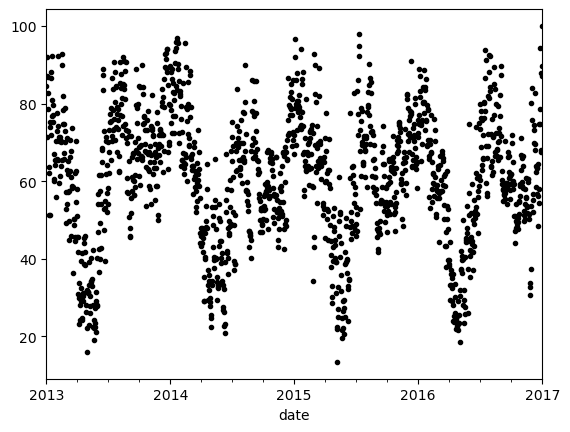

In [95]:
humidity.plot(style="k.")

In [96]:
humidity

date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64

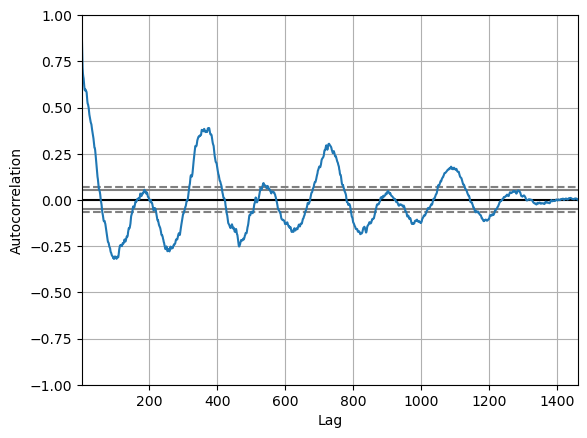

In [97]:
pd.plotting.autocorrelation_plot(humidity)
plt.show()

In [98]:

groups = humidity.groupby(pd.Grouper(freq='BA'))
years = pd.DataFrame()

for name,group in groups:
    years[name.year] = group.values
years.plot(subplots=True,legend=True)
plt.show()

ValueError: Length of values (2) does not match length of index (365)

In [43]:
years

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,68.7145,68.1354,70.5777,73.8631,84.1949,77.6839,79.4894,84.5159,84.2284,84.8147,...,110.6844,114.3266,107.3312,105.2722,113.4732,109.3477,103.2203,112.7694,114.7212,129.4048


<Axes: >

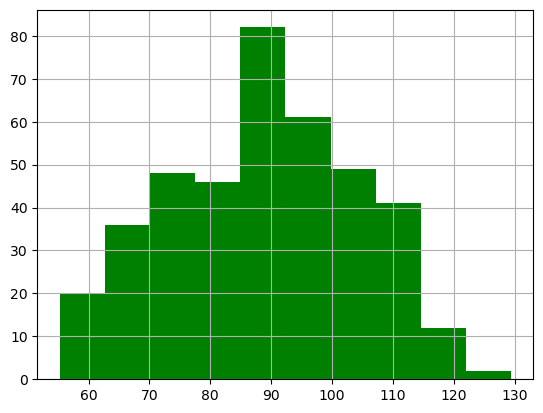

In [54]:
energy.hist(color="g")

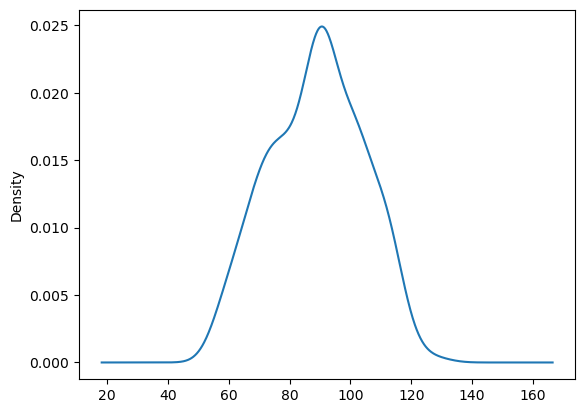

In [55]:
energy.plot(kind="kde")
plt.show()

## Boxer Whisker plot

In [101]:
groups = humidity.groupby(pd.Grouper(freq="AS"))
years = pd.DataFrame()
for name,group in groups:
    years[name.year] = group.values

years.boxplot(color="r")
plt.show()

ValueError: Length of values (366) does not match length of index (365)

In [102]:
humidity

date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64

In [103]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science\Time series

22-04-2024  12:08    <DIR>          .
17-04-2024  13:07    <DIR>          ..
22-04-2024  11:21    <DIR>          .ipynb_checkpoints
19-04-2024  12:15            55,852 daily-minimum-temperatures-in-me.csv
17-04-2024  12:18            55,837 daily-minimum-temperatures-in-me.csv.xls
19-04-2024  14:41            78,199 DailyDelhiClimateTrain.csv
19-04-2024  12:19           590,808 Data Preperation.ipynb
19-04-2024  12:15             7,318 Electric_Production.csv
19-04-2024  12:15             6,903 monthly-beer-production-in-austr.csv
22-04-2024  12:08           185,514 ploting time series.ipynb
22-04-2024  12:07           144,488 Resampling and Interpolation.ipynb
19-04-2024  12:15               509 sales-of-shampoo-over-a-three-ye.csv
22-04-2024  11:20               519 shampoo.csv.xls
18-04-2024  12:12            32,954 Time_Series_Forecasting.ipynb
              11 File(s)      

In [104]:
from datetime import datetime

In [110]:
energy = pd.read_csv("Electric_Production.csv",header=0,index_col=[0],parse_dates=True).squeeze()

In [113]:
energy.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [114]:
upsampled = energy.resample('D').mean()

In [115]:
upsampled

DATE
1985-01-01     72.5052
1985-01-02         NaN
1985-01-03         NaN
1985-01-04         NaN
1985-01-05         NaN
                ...   
2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
2017-12-31         NaN
2018-01-01    129.4048
Freq: D, Name: IPG2211A2N, Length: 12054, dtype: float64

In [116]:
len(upsampled)

12054

In [117]:
2018-1985

33

In [119]:
33*365

12045

In [120]:
interpolated = upsampled.interpolate(method='polynomial',order=5)
interpolated

DATE
1985-01-01     72.505200
1985-01-02     72.968408
1985-01-03     73.374391
1985-01-04     73.726016
1985-01-05     74.026065
                 ...    
2017-12-28    129.727546
2017-12-29    129.754540
2017-12-30    129.712470
2017-12-31    129.597281
2018-01-01    129.404800
Freq: D, Name: IPG2211A2N, Length: 12054, dtype: float64

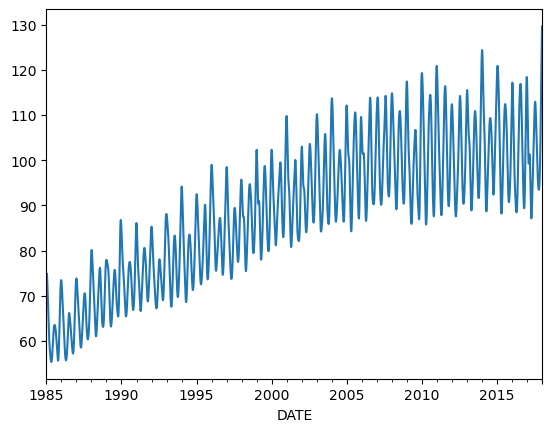

In [121]:
interpolated.plot()
plt.show()

### downsampling

DATE
1985-03-31     68.542467
1985-06-30     56.958967
1985-09-30     62.151100
1985-12-31     61.010133
1986-03-31     67.838233
                 ...    
2017-03-31    105.126733
2017-06-30     94.195567
2017-09-30    106.566800
2017-12-31    101.890267
2018-03-31    129.404800
Freq: Q-DEC, Name: IPG2211A2N, Length: 133, dtype: float64


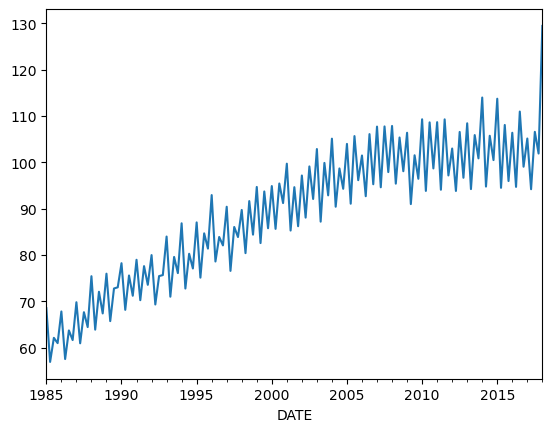

In [123]:
resample = energy.resample("Q")
quarterly_mean_energy = resample.mean()
print(quarterly_mean_energy)
quarterly_mean_energy.plot()
plt.show()

DATE
1985-12-31     745.9880
1986-12-31     752.5187
1987-12-31     788.8833
1988-12-31     836.5963
1989-12-31     862.7420
1990-12-31     879.7612
1991-12-31     901.3422
1992-12-31     901.4509
1993-12-31     932.1479
1994-12-31     951.0607
1995-12-31     984.7304
1996-12-31    1012.5890
1997-12-31    1010.8343
1998-12-31    1038.5289
1999-12-31    1070.2907
2000-12-31    1101.4815
2001-12-31    1097.5295
2002-12-31    1129.2849
2003-12-31    1148.4013
2004-12-31    1165.4307
2005-12-31    1190.4989
2006-12-31    1186.4787
2007-12-31    1223.8100
2008-12-31    1219.9679
2009-12-31    1185.9574
2010-12-31    1231.1626
2011-12-31    1227.4857
2012-12-31    1199.9999
2013-12-31    1228.0482
2014-12-31    1244.7934
2015-12-31    1236.6349
2016-12-31    1233.1725
2017-12-31    1223.3381
2018-12-31     129.4048
Freq: A-DEC, Name: IPG2211A2N, dtype: float64


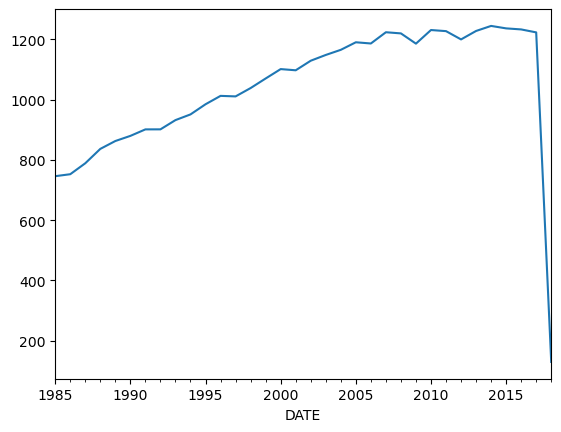

In [126]:
resample = energy.resample('A')
annual_sum_of_energy = resample.sum()
print(annual_sum_of_energy)
annual_sum_of_energy.plot()
plt.show()

### square root transform

In [131]:
dataframe = pd.DataFrame(interpolated.values)

In [133]:
dataframe.columns=["energy"]

In [134]:
dataframe

,energy
0,72.505200
1,72.968408
2,73.374391
3,73.726016
4,74.026065
...,...
12049,129.727546
12050,129.754540
12051,129.712470
12052,129.597281


In [135]:
dataframe["energy"] = np.sqrt(dataframe["energy"])

In [136]:
dataframe

,energy
0,8.514999
1,8.542155
2,8.565885
3,8.586385
4,8.603840
...,...
12049,11.389800
12050,11.390985
12051,11.389138
12052,11.384080


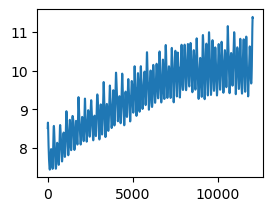

In [143]:
plt.figure()
plt.subplot(221)
plt.plot(dataframe["energy"])
plt.show()

### log Transform

In [ ]:
from math import exp
plt.figure(1)
plt.subplot(221)
plt.plot